In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from matplotlib.pyplot import figure
columns_to_timestamp = ['Ukončeno FLYER', 'Datum přidělení', 'Domluvená montáž', 'Datum zápisu','Aktivován', 'Vráceno Callcentru', 'Zrušeno','Volat znovu' ]
columns_to_drop = [ 'Plus freeSAT', 'Zdroj Plus freeSAT', 'HBO MaxPak', 'Zdroj HBO MaxPak', 'freeSAT HD', 'Zdroj freeSAT HD', 'Odebraná karta', 'Odebraný přijímač', 'Firma', 'Operator',   'Volat v',  'Zaplaceno obchodníkovy', 'Zaplaceno všem', 'Fakturace', 'Proplaceno', 'Číslo faktury',  'Služba', 'Vybrat peníze', 'Cena instalace', 'Občanský průkaz', 'IČO', 'Telefon 1', 'Telefon 2', 'Mobil', 'Email', 'Ulice', 'Číslo popisné', 'Číslo orientační', 'PSČ']

def make_timestamp(df):
    for i in columns_to_timestamp:
        df[i] =  pd.to_datetime(df[i], dayfirst=True)
    
Emergency_date = pd.to_datetime('2020-03-12')

def get_day_from_timedelta (x):
    day = x.days
    return day
    
# Merchants functions


def Get_Probability(Merchant) :
    dfA_cancled = df_all.loc[(df_all['Stav'] == 'Zrušen' ) & (df_all['Zdroj objednávky'] == Merchant)  ].count()['Kód kampaně']
    dfA_flyer = df_all.loc[(df_all['Stav'] == 'Ukončeno FLYER'  ) & (df_all['Zdroj objednávky'] == Merchant )  ].count()['Kód kampaně']
    if dfA_flyer == 0:
        Probability = 0
    else:    
        Probability = dfA_flyer/(dfA_flyer + dfA_cancled)
    return Probability

#Customers functions
def Age_from_birth_nuber(RC_test):
    if RC_test.find('/') != -1:
        year = RC_test[0:2]
        month = RC_test[2:4]
        day = RC_test[4:6]
        year_of_birth = f'{day}.{month}.19{year}'
    
    elif RC_test.find('.') != -1 and len(RC_test) < 10:
        year_of_birth = RC_test
    else:
        year_of_birth = 'NaN'
    return year_of_birth

def Get_gender(surname):
    if surname.find('ova') != -1 or surname.find('ová') != -1 or surname.find('OVÁ') != -1 or surname.find('OVA') != -1 or surname.find('otná') != -1 or surname.find('OTNÁ') != -1 :
        gender = True 
    elif surname == 'nan':
        gender = 'nan'
    else:
        gender = False
    return gender            

def Get_verification(x):
    if x.find('verifikováno') != -1 or x.find('Verifikováno') != -1 or x.find('Verifikován') != -1 or x.find('verifikován') != -1or x.find('verifikovat') != -1 :
        gender = True
    else:
        gender = False
    return gender            

In [2]:
df_all = pd.read_csv('intersat_final_df.csv')
make_timestamp(df_all)

df_all = df_all.drop(columns=columns_to_drop)
df_all = df_all.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1'])
df_all = df_all.sort_values(by=['ID'],ascending=False)

#clearing DF of tests clients
df_test1 = df_all.loc[(df_all['Jméno'] == 'TEST' )]
print(df_test1['Stav'].count())
df_all = df_all.drop(df_test1.index)

df_test2 = df_all.loc[(df_all['Příjmení'] == 'TEST' )]
print(df_test2['Stav'].count())
df_all = df_all.drop(df_test2.index)

# cleaning of duplicete rows by CRM
df_duplicate = df_all.loc[(df_all['Duvod zrušení'] == 'Duplicitní záznam' )]
df_all = df_all.drop(df_duplicate.index)
print(df_duplicate['Stav'].count())

df_all['Příjmení'] = df_all['Příjmení'].astype(str)
df_all['gender'] = df_all['Příjmení'].apply(Get_gender)

df_all['Rodné číslo'] = df_all['Rodné číslo'].astype(str)
df_all['Datum narození'] = df_all['Rodné číslo'].apply(Age_from_birth_nuber)
df_all['Datum narození'] =  pd.to_datetime(df_all['Datum narození'], dayfirst=True, errors='coerce')
df_all['věk']= 2020 - df_all['Datum narození'].dt.year
df_all.loc[(df_all['věk'] < 15) ] = round(df_all['věk'].mean())

#cleaning of empty merchant
df_all.loc[df_all['Zdroj objednávky'].isna()  , "Zdroj objednávky"] = "Unknow"
df_gg = df_all.loc[(df_all['Zdroj objednávky'] == 'Unknow')]
print(df_gg['Zdroj objednávky'].count())

#Buttons
re_arr = df_all['Duvod zrušení'].unique()
re = []
re = re_arr.tolist()
del re[0]
re_button = widgets.Dropdown(
    options= re ,
    
    description='Důvod',
    disabled=False,
)

#Dropdown button - Sales mans 
sales_man_arr = df_all['Zdroj objednávky'].unique()
Sales_man = []
Sales_man = sales_man_arr.tolist()
Selers_button = widgets.Dropdown(
    options= Sales_man ,
    
    description='Obchodník',
    disabled=False,
)

Button_Overall_cancled = widgets.Checkbox(
    value=False,
    description='Overall Cancled',
    disabled=False,
#     indent=False
)

code_arr = df_all['Kód kampaně'].unique()
# re = []
# re = re_arr.tolist()
# del re[0]
code_button = widgets.Dropdown(
    options= code_arr ,
    
    description='Kampáň',
    disabled=False,
)

stav_time = widgets.RadioButtons(
    options=['FLAYER', 'Zrušeno', 'Both'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Stav :',
    disabled=False
)

dfA = df_all

print('Buttons ready')

C:\Users\fandl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3
2
556
27
Buttons ready


In [7]:
df_all.columns

Index(['Aktivován', 'Datum přidělení', 'Datum zápisu', 'Dokumenty',
       'Domluvená montáž', 'Duvod zrušení', 'Evidenční číslo', 'ID', 'Jméno',
       'Karta', 'Kód kampaně', 'Město', 'Název kampaně', 'Poznámky',
       'Přijímač', 'Příjmení', 'Rodné číslo', 'Smlouva', 'Stav', 'Technik',
       'Titul', 'Ukončeno FLYER', 'Urgence', 'Volat znovu',
       'Vráceno Callcentru', 'Zdroj objednávky', 'Zrušeno', 'Čas montáže',
       'Šéftechnik', 'gender', 'Datum narození', 'věk'],
      dtype='object')

## Sales_over_time

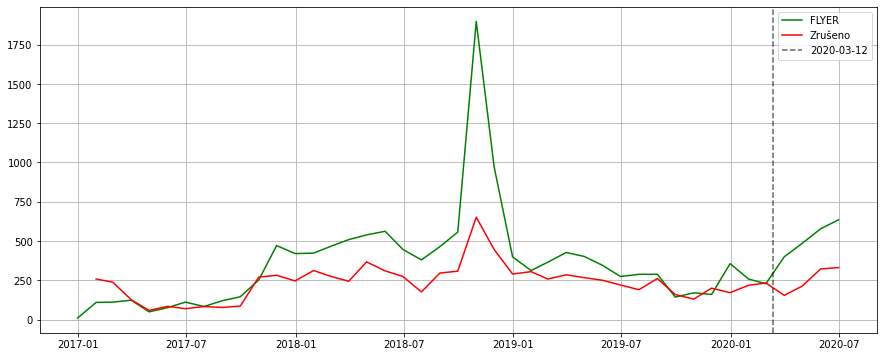

In [5]:
dfA = df_all
#FLYER
Overview_of_sales = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )]
#key is difrent column that previus "ukon4eno FLYER"
Overview_of_sales = Overview_of_sales.groupby(pd.Grouper(key='Ukončeno FLYER', freq="m")).count()
#slicing misstakes of merchants
Overview_of_sales = Overview_of_sales['Stav'][35:-1]


#making DF for linear regresion 
df_OS = Overview_of_sales.to_frame()

# df_OS['months_from_start'] = (df_OS.index - df_OS.index[0]).days/30; df_OS 
# df_OS = df_OS.round(0)

fig, ax = plt.subplots(figsize=(15, 6))
# figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')

Overview_of_cancled = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(pd.Grouper(key='Zrušeno', freq="M")).count()
Overview_of_cancled = Overview_of_cancled['Stav'][:-1]
df_CO = Overview_of_cancled.to_frame()
plt.plot(Overview_of_sales, c='g', label='FLYER',)
plt.plot(Overview_of_cancled, c='r',label='Zrušeno')
ax.axvline(Emergency_date, color='k', label=Emergency_date.date(), ls='dashed', alpha=0.6)
plt.grid()
plt.legend()
df_all_merge = pd.merge(df_OS, df_CO, left_index=True, right_index=True)
df_all_merge = df_all_merge.rename(columns={"Stav_x": "FLAYER Absolute","Stav_y": "Zrušeno Absolute"})
# df_all_merge[''] = 
# print(df_all_merge)


In [5]:
# Desctriptive statistic
df_all_merge['FLAYER Relative'] = df_all_merge['FLAYER Absolute']/(df_all_merge['FLAYER Absolute'] + df_all_merge['Zrušeno Absolute'])
df_all_merge['Zrušeno Relative'] = df_all_merge['Zrušeno Absolute']/(df_all_merge['FLAYER Absolute'] + df_all_merge['Zrušeno Absolute'])
df_all_merge['Celkem'] = df_all_merge['FLAYER Absolute'] + df_all_merge['Zrušeno Absolute']
df_all_merge['Positive Ratio'] = df_all_merge['FLAYER Absolute'] > df_all_merge['Zrušeno Absolute']
df_all_merge

,FLAYER Absolute,Zrušeno Absolute,FLAYER Relative,Zrušeno Relative,Celkem,Positive Ratio
2017-01-31,109,258,0.297003,0.702997,367,False
2017-02-28,111,238,0.318052,0.681948,349,False
2017-03-31,123,126,0.493976,0.506024,249,False
2017-04-30,49,58,0.457944,0.542056,107,False
2017-05-31,76,84,0.475000,0.525000,160,False
2017-06-30,111,69,0.616667,0.383333,180,True
2017-07-31,83,83,0.500000,0.500000,166,False
2017-08-31,120,77,0.609137,0.390863,197,True
2017-09-30,145,86,0.627706,0.372294,231,True
2017-10-31,252,270,0.482759,0.517241,522,False


## Code of camping overall - FLAYER

AxesSubplot(0.125,0.125;0.775x0.755)


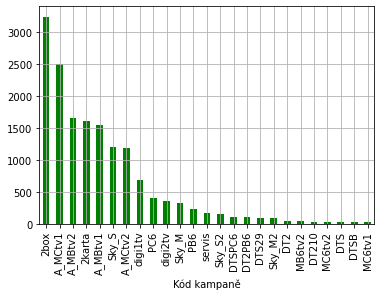

In [58]:
df_camping = df_all.loc[(df_all['Stav'] == 'Ukončeno FLYER' )].groupby(['Kód kampaně']).count()['ID']

df_camping_good = df_camping.to_frame()
print(df_camping.sort_values(ascending=False).head(25).plot(kind='bar', color='G',grid=1))

AxesSubplot(0.125,0.125;0.775x0.755)


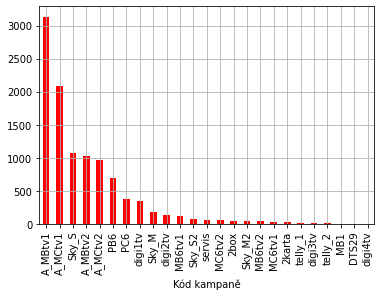

In [59]:
df_camping2 = df_all.loc[(df_all['Stav'] == 'Zrušen' )].groupby(['Kód kampaně']).count()['ID']
df_camping_bad = df_camping2.to_frame()

print(df_camping2.sort_values(ascending=False).head(25).plot(kind='bar', color='R',grid=1))

In [60]:
df_camping_merge = pd.merge(df_camping_good, df_camping_bad, left_index=True, right_index=True)
df_camping_merge = df_camping_merge.rename(columns={"ID_x": "FLAYER Absolute","ID_y": "Zrušeno Absolute"})
df_camping_merge['FLAYER Relative'] = df_camping_merge['FLAYER Absolute']/(df_camping_merge['FLAYER Absolute'] + df_camping_merge['Zrušeno Absolute'])
df_camping_merge['Zrušeno Relative'] = df_camping_merge['Zrušeno Absolute']/(df_camping_merge['FLAYER Absolute'] + df_camping_merge['Zrušeno Absolute'])
df_camping_merge['Celkem'] = df_camping_merge['FLAYER Absolute'] + df_camping_merge['Zrušeno Absolute']
df_camping_merge['Positive Ratio'] = df_camping_merge['FLAYER Absolute'] > df_camping_merge['Zrušeno Absolute']
df_camping_merge


,FLAYER Absolute,Zrušeno Absolute,FLAYER Relative,Zrušeno Relative,Celkem,Positive Ratio
Kód kampaně,,,,,,
2box,3234,45,0.986276,0.013724,3279,True
2karta,1606,23,0.985881,0.014119,1629,True
A_MBtv1,1537,3134,0.329052,0.670948,4671,False
A_MBtv2,1645,1027,0.615644,0.384356,2672,True
A_MC6tv1,2,3,0.400000,0.600000,5,False
A_MCtv1,2495,2089,0.544284,0.455716,4584,True
A_MCtv2,1182,958,0.552336,0.447664,2140,True
DT2,43,2,0.955556,0.044444,45,True
DT210,34,2,0.944444,0.055556,36,True


## sales_specific_camping

Dropdown(description='Kampáň', options=('A_MBtv1', 'A_MBtv2', 'servis', 'Sky_S', '2box', 'telly_2', 'Sky_S2', …

RadioButtons(description='Stav :', index=2, options=('FLAYER', 'Zrušeno', 'Both'), value='Both')

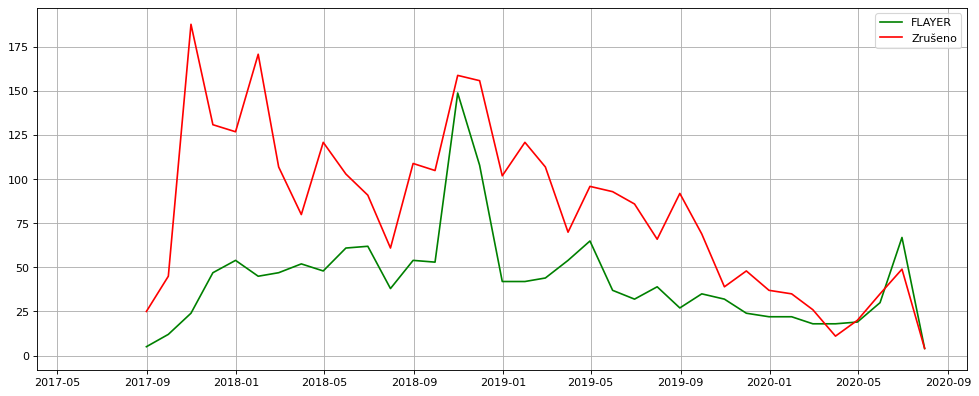

,A_MBtv1_x,A_MBtv1_y
2017-01-31,NaN,NaN
2017-02-28,NaN,NaN
2017-03-31,NaN,NaN
2017-04-30,NaN,NaN
2017-05-31,3.0,1.0
2017-06-30,NaN,NaN
2017-07-31,NaN,NaN
2017-08-31,5.0,25.0
2017-09-30,12.0,45.0
2017-10-31,24.0,188.0


In [92]:
code_button
display(code_button)
stav_time
display(stav_time)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')


in_time_camping_F = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )].groupby([pd.Grouper(key='Ukončeno FLYER', freq="M"),pd.Grouper(key='Kód kampaně'),]).count()['ID']
in_time_camping_F =  in_time_camping_F.unstack()
XX = in_time_camping_F[code_button.value]
XX_2 = XX.to_frame()
in_time_camping_Z = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby([pd.Grouper(key='Zrušeno', freq="M"),pd.Grouper(key='Kód kampaně'),]).count()['ID']
in_time_camping_Z =  in_time_camping_Z.unstack()
XY = in_time_camping_Z[code_button.value]
XY_2 = XY.to_frame()
df_camping_time = pd.merge(XX_2, XY_2, left_index=True, right_index=True)
# df_camping_time = df_camping_merge.rename(columns={"ID_x": "FLAYER Absolute","ID_y": "Zrušeno Absolute"})
# df_camping_time['FLAYER Relative'] = df_camping_time['FLAYER Absolute']/(df_camping_merge['FLAYER Absolute'] + df_camping_merge['Zrušeno Absolute'])
# df_camping_time['Zrušeno Relative'] = df_camping_time['Zrušeno Absolute']/(df_camping_merge['FLAYER Absolute'] + df_camping_merge['Zrušeno Absolute'])
# df_camping_time['Celkem'] = df_camping_time['FLAYER Absolute'] + df_camping_merge['Zrušeno Absolute']
# df_camping_time['Positive Ratio'] = df_camping_merge['FLAYER Absolute'] > df_camping_merge['Zrušeno Absolute']

if stav_time.value == 'FLAYER':
    plt.plot(XX,label='FLAYER',color='g')
elif stav_time.value == 'Zrušeno' :
    plt.plot(XY,label='Zrušeno',color='r')
elif stav_time.value == 'Both':
    plt.plot(XX,label='FLAYER',color='g')
    plt.plot(XY,label='Zrušeno',color='r')
    
# in_time_camping = dfA.loc[(dfA['Stav'] == stav )].groupby([pd.Grouper(key=gruper, freq="M"),pd.Grouper(key='Kód kampaně'),]).count()['ID']
# in_time_camping =  in_time_camping.unstack()
# XX = in_time_camping[code_button.value]
# plt.plot(XX, label=[code_button.value], color=color)
plt.legend()
plt.grid()
plt.show()

df_camping_time

In [93]:
in_time_camping_F

Kód kampaně,2box,2karta,A_MBtv1,A_MBtv2,A_MC6tv1,A_MCtv1,A_MCtv2,DIL,DT2,DT210,...,Sky_M,Sky_M2,Sky_S,Sky_S2,digi1tv,digi2tv,digi3tv,digi4tv,servis,telly_1
Ukončeno FLYER,,,,,,,,,,,,,,,,,,,,,
2014-01-31,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-29,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-31,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Reasons_of_canceling - comulative 

Duvod zrušení
Pouze se dotazoval                                3525
Problémový klient                                 2030
Technicky nemožná montáž                          1101
Klienta nelze kontaktovat                          940
Nesouhlasí s cenou programové nabídky              504
Službu freeSAT již vlastní                         470
Klient neprošel autorizací na Freesat              423
Klient se ozve sám zpět                            323
Nemá finanční prostředky                           199
Vráceno zpět dispečinku                            192
Nesouhlasí s cenou instalace                       185
Klient dostal špatné info o programové skladbě      63
Klient dostal špatné info - celkově                 44
Klient nemá potřebné doklady                        12
Klient dostal špatné info o ceně instalace           5
Name: ID, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


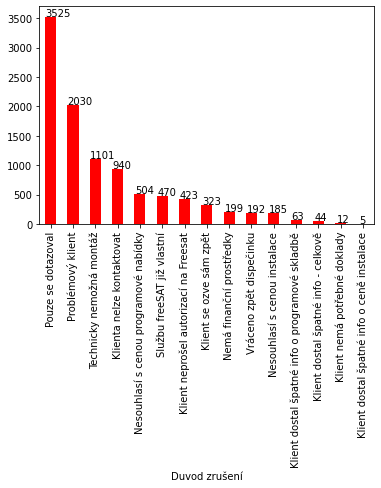

In [8]:
dfA= df_all
#querie
dfA_roc = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(['Duvod zrušení']).count().sort_values(by=['ID'],ascending=False)['ID']

print(dfA_roc)
XX = dfA_roc.plot(kind='bar', color='r',)
print (XX)
for p in XX.patches:
    XX.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() +10), rotation=0)

## Reason_of_canceling  Time_line

Dropdown(description='Důvod', options=('Pouze se dotazoval', 'Problémový klient', 'Klient dostal špatné info -…

Checkbox(value=False, description='Overall Cancled')

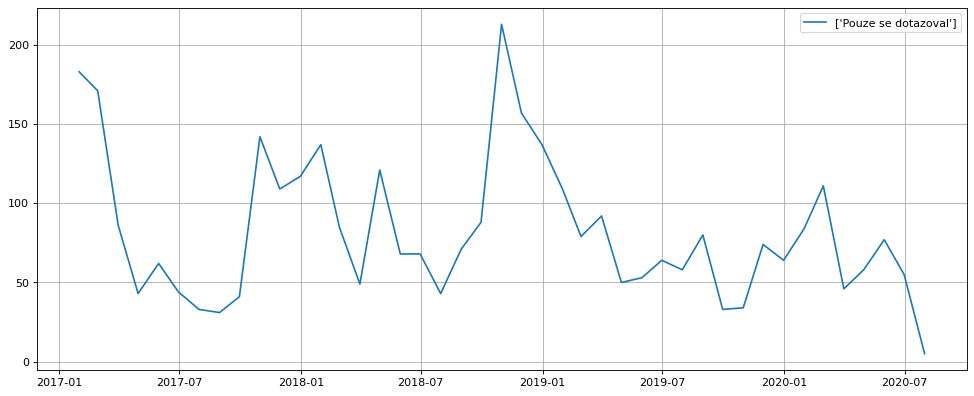

In [59]:
re_dashbord = re_button
Button_Overall_cancled
display(re_dashbord)
display(Button_Overall_cancled)

figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
dfA = df_all
Overview_of_cancled2 = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby([pd.Grouper(key='Zrušeno', freq="M"),pd.Grouper(key='Duvod zrušení'),]).count()['ID']
Overview_of_cancled2 = Overview_of_cancled2.unstack()
XX = plt.plot(Overview_of_cancled2[re_button.value], label=[re_button.value])
XX
plt.grid()

if Button_Overall_cancled.value == True:
    plt.plot(Overview_of_cancled, c='r',label='Zrušeno')


plt.legend()


Dropdown(description='Kampáň', options=('A_MBtv1', 'A_MBtv2', 'servis', 'Sky_S', '2box', 'telly_2', 'Sky_S2', …

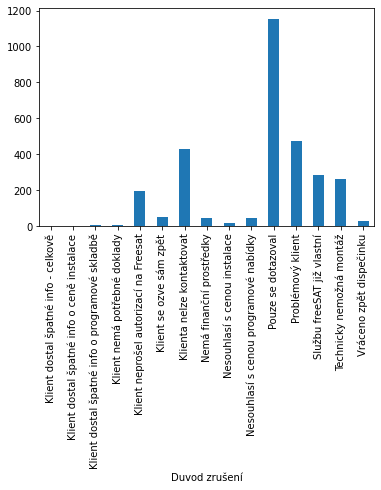

Duvod zrušení
Klient dostal špatné info - celkově                  2.0
Klient dostal špatné info o ceně instalace           NaN
Klient dostal špatné info o programové skladbě       3.0
Klient nemá potřebné doklady                         5.0
Klient neprošel autorizací na Freesat              192.0
Klient se ozve sám zpět                             51.0
Klienta nelze kontaktovat                          429.0
Nemá finanční prostředky                            45.0
Nesouhlasí s cenou instalace                        14.0
Nesouhlasí s cenou programové nabídky               42.0
Pouze se dotazoval                                1154.0
Problémový klient                                  471.0
Službu freeSAT již vlastní                         285.0
Technicky nemožná montáž                           263.0
Vráceno zpět dispečinku                             30.0
Name: A_MBtv1, dtype: float64


In [60]:
dfA= df_all
#querie
dfA_cam_reason = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby([pd.Grouper(key='Kód kampaně',),pd.Grouper(key='Duvod zrušení'),]).count().sort_values(by=['ID'],ascending=False)['ID'].unstack()

code_button_2 = code_button
display(code_button_2)
dfA_cam_reason.loc[( code_button_2.value )].plot(kind='bar')
plt.show()
print(dfA_cam_reason.loc[( code_button_2.value )])

In [99]:
dfA_cam_reason

Duvod zrušení,Klient dostal špatné info - celkově,Klient dostal špatné info o ceně instalace,Klient dostal špatné info o programové skladbě,Klient nemá potřebné doklady,Klient neprošel autorizací na Freesat,Klient se ozve sám zpět,Klienta nelze kontaktovat,Nemá finanční prostředky,Nesouhlasí s cenou instalace,Nesouhlasí s cenou programové nabídky,Pouze se dotazoval,Problémový klient,Službu freeSAT již vlastní,Technicky nemožná montáž,Vráceno zpět dispečinku
Kód kampaně,,,,,,,,,,,,,,,
2box,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,1.0,NaN,5.0,NaN,NaN,2.0,1.0
2karta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,1.0,2.0,1.0,NaN
A_MB6tv1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A_MBtv1,2.0,NaN,3.0,5.0,192.0,51.0,429.0,45.0,14.0,42.0,1154.0,471.0,285.0,263.0,30.0
A_MBtv2,6.0,1.0,5.0,NaN,124.0,48.0,74.0,21.0,19.0,42.0,174.0,267.0,23.0,148.0,18.0
A_MC6tv1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
A_MCtv1,16.0,NaN,23.0,1.0,57.0,80.0,108.0,36.0,36.0,111.0,544.0,611.0,60.0,300.0,47.0
A_MCtv2,4.0,1.0,13.0,2.0,19.0,43.0,33.0,7.0,25.0,47.0,281.0,214.0,47.0,142.0,18.0
DT210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN


## Top_board_of_merchants

Zdroj objednávky
Vazac call3 FREE     2857
TV DIGI              1349
By_JJ                 955
Michal Krátký         903
Inter-sat WEB         546
                     ... 
By_RK                  18
Petr Tobiska           18
Vlastimil Metelec      18
By_TR                  18
Milan Doleček          18
Name: ID, Length: 100, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


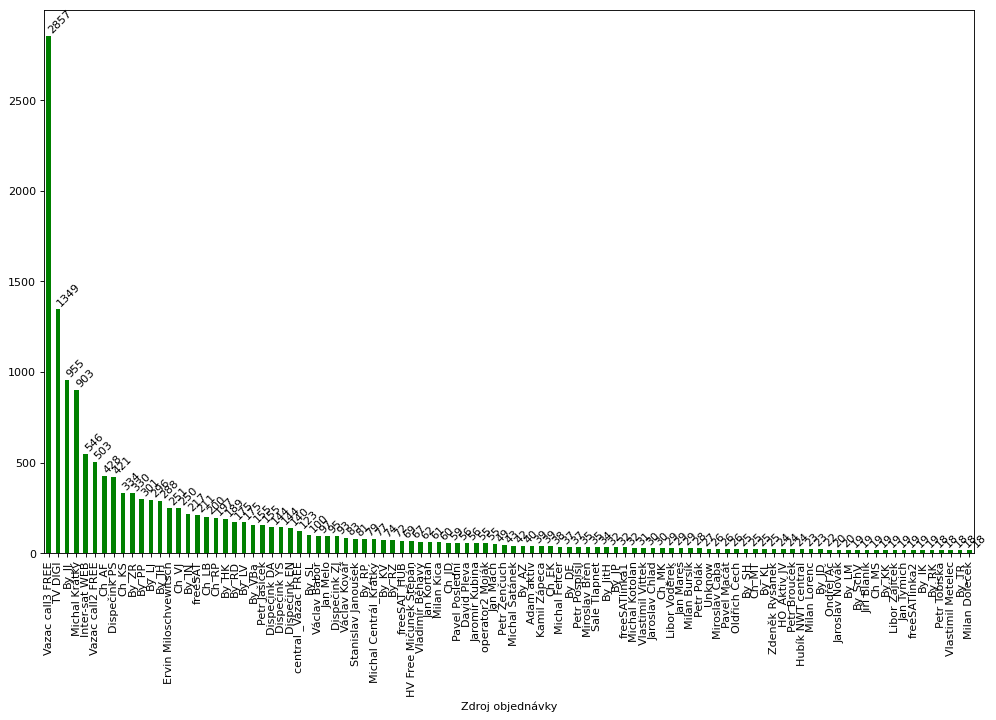

In [64]:
number_graf = 100

figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
bb = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(['Zdroj objednávky'])

x = bb.groups.keys()

bb = bb.count()
ba = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )].groupby(['Zdroj objednávky']).count()
#print(x)
XX = ba['ID'].sort_values(ascending=False).head(number_graf).plot(kind='bar',color='g')
print(ba['ID'].sort_values(ascending=False).head(number_graf))
print(XX)
for p in XX.patches:
    XX.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() +15), rotation=45)

Zdroj objednávky
Inter-sat WEB       2418
Vazac call3 FREE    1669
By_JJ                465
Vazac call2 FREE     411
Michal Krátký        408
                    ... 
Václav Babor           6
By_MD                  5
By_LK                  5
By_MH                  5
Alexander Sabol        5
Name: ID, Length: 70, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


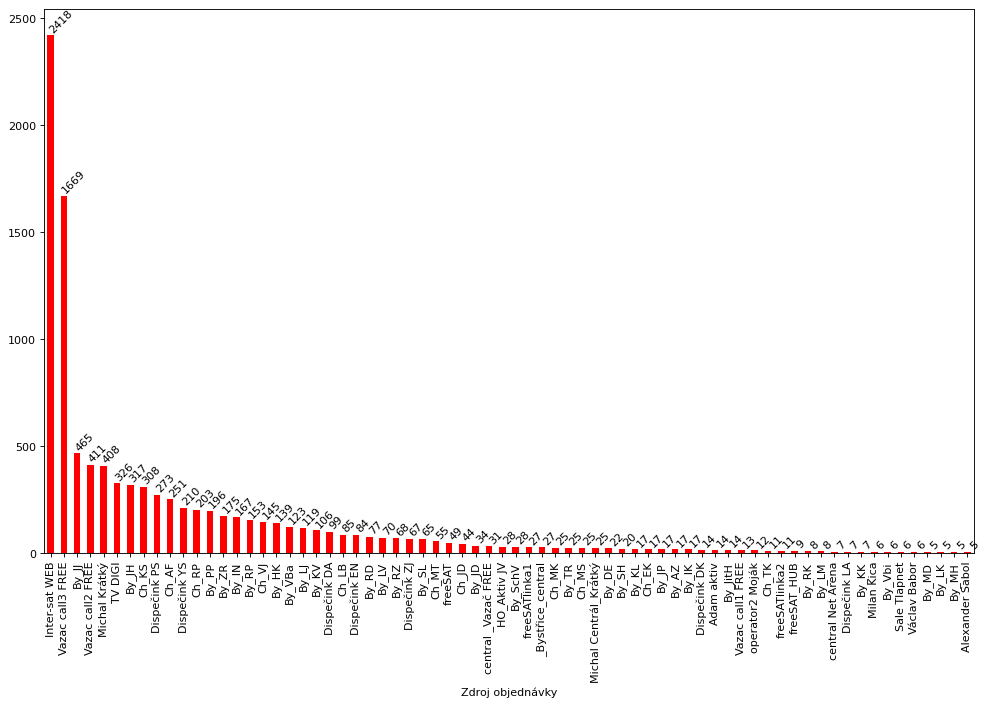

In [65]:
number_graf = 70

figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
bb = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(['Zdroj objednávky'])

x = bb.groups.keys()

bb = bb.count()
ba = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )].groupby(['Zdroj objednávky']).count()
#print(x)
XX = bb['ID'].sort_values(ascending=False).head(number_graf).plot(kind='bar',color='r')
print(bb['ID'].sort_values(ascending=False).head(number_graf))
print(XX)
for p in XX.patches:
    XX.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() +15), rotation=45)

## Overwiev of mechant
#### unfornutely ipwidgets does not work :(

Dropdown(description='Obchodník', index=2, options=('Michal Krátký', 'Alexander Sabol', 'By_JJ', 'By_RP', 'By_…

Počet FLAYER : 955
Počet Zrušen : 465
Positive ratio of sales
Ratio of sales : 490
Probability of Flayer : 0.6725352112676056
Most Flayer City : Ústí nad Labem 10
Most Zrušeno City : Plzeň 7
Průměrná doba Flayer :  7.2 dní
Průměrná doba zrušení :  25.6 dní
False    1010
True      467
Name: gender, dtype: int64



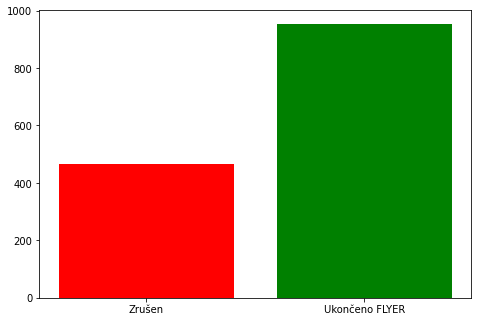

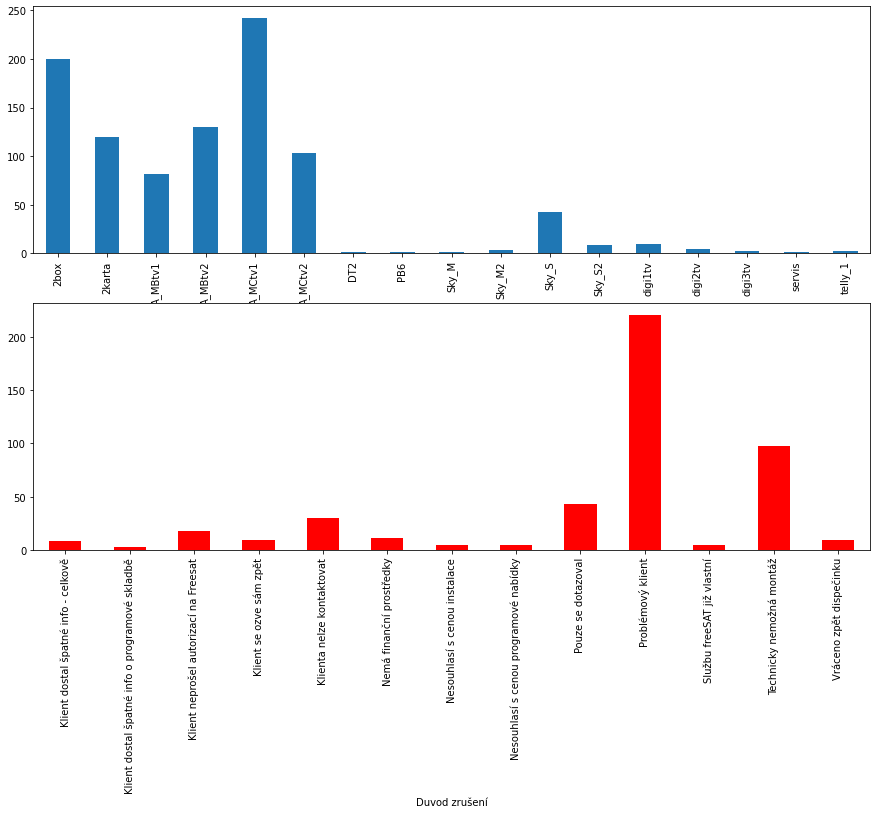

<Figure size 1200x1200 with 0 Axes>

In [57]:
one_sales_dashbord = Selers_button
display(one_sales_dashbord)
dfA = df_all
#queries
dfA_cancled = dfA.loc[(dfA['Stav'] == 'Zrušen' ) & (dfA['Zdroj objednávky'] == Selers_button.value)  ].count()['ID']
dfA_flyer = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER'  ) & (dfA['Zdroj objednávky'] == Selers_button.value)  ].count()['ID']

#groupby object
dfA_cancled_byreason = dfA.loc[(dfA['Stav'] == 'Zrušen' )& (dfA['Zdroj objednávky'] == Selers_button.value)].groupby(['Duvod zrušení']).count()['ID']
dfA_cancled_by_city = dfA.loc[(dfA['Stav'] == 'Zrušen' )& (dfA['Zdroj objednávky'] == Selers_button.value)].groupby(['Město']).count()['ID']
dfA_flyer_by_city = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )& (dfA['Zdroj objednávky'] == Selers_button.value)].groupby(['Město']).count()['ID']
dfA_camping_F = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )& (dfA['Zdroj objednávky'] == Selers_button.value)].groupby(['Kód kampaně']).count()['ID']

dfA_gender = df_all.loc[(df_all['Zdroj objednávky'] == Selers_button.value)]['gender'].value_counts().head(2)



try: 
    best_city = dfA_flyer_by_city.idxmax()
except ValueError:
    best_city = 'NaN'  

try: 
    worst_city = dfA_cancled_by_city.idxmax()
except ValueError:
    worst_city = 'NaN'  


print('Počet FLAYER :',dfA_flyer)
print('Počet Zrušen :',dfA_cancled)


if dfA_cancled < dfA_flyer:
    print('Positive ratio of sales')
else:
    print('Negative ratio of sales' )
print('Ratio of sales :', dfA_flyer-dfA_cancled)
print('Probability of Flayer :',Get_Probability(Selers_button.value))
print('Most Flayer City :', best_city ,dfA_flyer_by_city.max())
print('Most Zrušeno City :',worst_city, dfA_cancled_by_city.max()   )  

dfA_mean_time = dfA.loc[(dfA['Zdroj objednávky'] == Selers_button.value)][['Datum zápisu','Zrušeno','Ukončeno FLYER']]#.mean()
dfA_mean_time['Průměrná doba zrušení'] = dfA['Zrušeno'] - dfA['Datum zápisu']
# dfA_mean_time['Průměrná doba zrušení'] = dfA_mean_time['Průměrná doba zrušení']#.apply(pd.Timedelta.days)
dfA_mean_time['Průměrná doba FLAYER'] = dfA['Ukončeno FLYER'] - dfA['Datum zápisu']
dfA_mean_F = dfA_mean_time['Průměrná doba FLAYER'].dropna()
dfA_mean_F = dfA_mean_F.apply(get_day_from_timedelta)
print('Průměrná doba Flayer : ',round(dfA_mean_F.mean(),1), 'dní')
dfA_mean_Z = dfA_mean_time['Průměrná doba zrušení'].dropna()
dfA_mean_Z = dfA_mean_Z.apply(get_day_from_timedelta)
print('Průměrná doba zrušení : ',round(dfA_mean_Z.mean(),1), 'dní')
      
                                       
print(dfA_gender)
    #ploting graph
fig3 = plt.figure()
ax = fig3.add_axes([0,0,1,1])
ax.bar(['Zrušen'],dfA_cancled, color = 'r')
ax.bar(['Ukončeno FLYER', ],dfA_flyer, color = 'g')

# plt.show()
#print(GG, GG2)
print()
fig, (ax1, ax2,) = plt.subplots(2, 1,figsize=(15, 10))
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
try:
    dfA_cancled_byreason.plot( ax=ax2 ,legend=False,kind='bar', color='r') 
except:
    pass

try:
    dfA_camping_F.plot( ax=ax1,legend=False,kind='bar')
except:
    pass

# plt.xticks(rotation=45)
plt.show()
# dfA_cancled_by_city

## Male/Female 

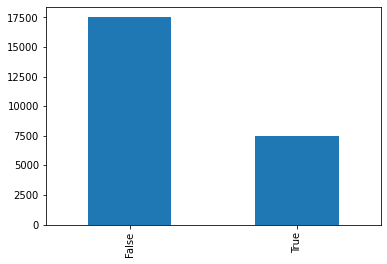

In [170]:
df_all['gender'].value_counts().head(2).plot(kind='bar')

## Age_overall


In [65]:
Age1 = len(df_all['věk'])
Age2 = df_all['věk'].isna().sum()
Age = Age1 - Age2 
print('From',Age1,'rows only',Age,'customers have provided sufficient info')
print('Its',100-Age2/Age1*100,'%')
age_mean = df_all['věk'].mean()
print('Mean age of customer is :', age_mean )

From 26545 rows only 4721 customers have provided sufficient info
Its 17.78489357694481 %
Mean age of customer is : 57.024782884981995


## Flayer_by_city

AxesSubplot(0.125,0.125;0.775x0.755)


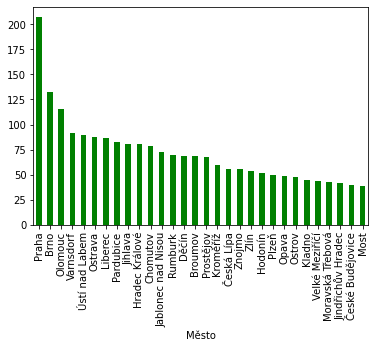

In [49]:
Flayer_by_city = dfA.loc[(dfA['Stav'] == 'Ukončeno FLYER' )].groupby(['Město']).count().sort_values(by=['ID'],ascending=False)

print(Flayer_by_city['ID'].sort_values(ascending=False).head(30).plot(kind='bar',color='G'))

## Cancled_by_city

AxesSubplot(0.125,0.125;0.775x0.755)


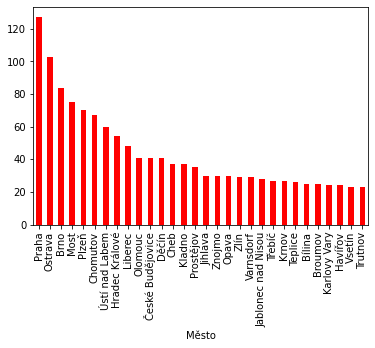

In [53]:
Cancled_by_city = dfA.loc[(dfA['Stav'] == 'Zrušen' )].groupby(['Město']).count().sort_values(by=['ID'],ascending=False)
print(Cancled_by_city['ID'].sort_values(ascending=False).head(30).plot(kind='bar', color='r'))

In [54]:
df_city_merge = pd.merge(Flayer_by_city['ID'], Cancled_by_city['ID'], left_index=True, right_index=True)
df_city_merge = df_city_merge.rename(columns={"ID_x": "FLAYER Absolute","ID_y": "Zrušeno Absolute"})
df_city_merge['FLAYER Relative'] = df_city_merge['FLAYER Absolute']/(df_city_merge['FLAYER Absolute'] + df_city_merge['Zrušeno Absolute'])
df_city_merge['Zrušeno Relative'] = df_city_merge['Zrušeno Absolute']/(df_city_merge['FLAYER Absolute'] + df_city_merge['Zrušeno Absolute'])
df_city_merge['Celkem'] = df_city_merge['FLAYER Absolute'] + df_city_merge['Zrušeno Absolute']
df_city_merge['Positive Ratio'] = df_city_merge['FLAYER Absolute'] > df_city_merge['Zrušeno Absolute']
df_city_merge.head(50)


,FLAYER Absolute,Zrušeno Absolute,FLAYER Relative,Zrušeno Relative,Celkem,Positive Ratio
Město,,,,,,
Praha,207,127,0.619760,0.380240,334,True
Brno,132,84,0.611111,0.388889,216,True
Olomouc,116,41,0.738854,0.261146,157,True
Varnsdorf,92,29,0.760331,0.239669,121,True
Ústí nad Labem,90,60,0.600000,0.400000,150,True
Ostrava,88,103,0.460733,0.539267,191,False
Liberec,87,48,0.644444,0.355556,135,True
Pardubice,83,23,0.783019,0.216981,106,True
Hradec Králové,81,54,0.600000,0.400000,135,True


# Volat znovu

In [86]:
df_call_again = dfA.loc[(dfA['Volat znovu'].notnull() )]
call_again = df_call_again.groupby(['Stav']).count()['ID']
print('Probability of Flayer after "Volat znovu" is :',(4586+5+27)/(4586+5055+178+136)*100)


Probability of Flayer after "Volat znovu" is : 46.388749372174786


In [77]:
call_again

Stav
57                       6
Aktivován                5
Domluvená montáž        27
Nekontaktován            1
Ukončeno FLYER        4586
Verifikován              8
Volat znovu            136
Vráceno callcentru     178
Zrušen                5055
Name: ID, dtype: int64

## Vráceno callcentru

In [84]:
df_back_to_call = dfA.loc[(dfA['Vráceno Callcentru'].notnull() )]
back_to_call = df_back_to_call.groupby(['Stav']).count()['ID']
print('Probability of Flayer after "Vraceno callcentru is : "',529/(353+3399+46)*100)

Probability of Flayer after "Vraceno callcentru is : " 13.92838335966298


In [80]:
back_to_call

Stav
57                       6
Aktivován                5
Domluvená montáž        12
Nekontaktován            2
Ukončeno FLYER         529
Verifikován              9
Volat znovu             46
Vráceno callcentru     353
Zrušen                3399
Name: ID, dtype: int64

In [5]:
df_back = dfA.loc[(dfA['Vráceno Callcentru'].notnull())  & (dfA['Volat znovu'].notnull())]  
df_back.groupby(['Stav']).count()['ID']

Stav
57                       6
Aktivován                3
Domluvená montáž         7
Nekontaktován            1
Ukončeno FLYER         460
Verifikován              3
Volat znovu             46
Vráceno callcentru     178
Zrušen                2177
Name: ID, dtype: int64

## Instal rate of technik

In [88]:
dfA['Poznámky'] = dfA['Poznámky'].astype(str)
dfA['verify'] = dfA['Poznámky'].apply(Get_verification)

In [89]:
dfA['verify'].value_counts()

False    23048
True      3497
Name: verify, dtype: int64

In [90]:
3497/(23048+3497)*100

13.173855716707477

In [17]:
vv = dfA.loc[(dfA['ID'] == 83084 )]['Poznámky']
vv = vv.values[0]
vv

'27.06.2020 18:04:24\nDavid Pleva\nHotovo\n25.06.2020 10:03:07\nDispečink PS\nkomplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví\n25.06.2020 09:13:20\n_Bystřice_central\nVerifikováno, komplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví\n24.06.2020 20:53:47\nMichal Krátký\nFS medium na 2tv/balíčky ne / měl digi/\nZatím nebyly přoloženy žádné dokumenty\nNahrát soubor'

In [23]:
# ff = []
ff = vv.split('\n')[:-2]
ff

['27.06.2020 18:04:24',
 'David Pleva',
 'Hotovo',
 '25.06.2020 10:03:07',
 'Dispečink PS',
 'komplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví',
 '25.06.2020 09:13:20',
 '_Bystřice_central',
 'Verifikováno, komplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví',
 '24.06.2020 20:53:47',
 'Michal Krátký',
 'FS medium na 2tv/balíčky ne / měl digi/']

In [21]:
ff

['27.06.2020 18:04:24David PlevaHotovo',
 'Hotovo25.06.2020 10:03:07komplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví',
 'Dispečink PSkomplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu víVerifikováno, komplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví',
 '25.06.2020 09:13:20_Bystřice_centralFS medium na 2tv/balíčky ne / měl digi/']

In [24]:
x = ff
x = [x[i] +' '+ x[i+1] +' '+ x[i+2] for i in range(0,len(x),3)]

In [25]:
x[2]

'25.06.2020 09:13:20 _Bystřice_central Verifikováno, komplet 2 tv 348 Kč, standartní instalaci 300 Kč hradí klient, o případném nadstandartu ví'

In [114]:
import re, datetime

In [129]:
# s = "I have a meeting on 2018-12-10 in New York"

xxx = x[2]

match = re.search('\d{2}.\d{2}.\d{4}.\d{2}.\d{2}', xxx )
date = datetime.datetime.strptime(match.group(), '%d.%m.%Y %H:%M')
print (type(date))

<class 'datetime.datetime'>


In [113]:
print(type(xxx))

<class 'str'>
